In [28]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# from imblearn.over_sampling import RandomOverSampler  # 
# from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
# from imblearn.over_sampling import SMOTE,ADASYN

In [29]:
df = pd.read_csv("us_heart.csv")

In [30]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,...,BMI,heartRate,glucose,Heart-Att,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,...,26.97,80.0,77.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,...,28.73,95.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,...,25.34,75.0,70.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,...,28.58,65.0,103.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,...,23.10,85.0,85.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df = df[['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BP Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot cholesterol',
       'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att']]

In [32]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BP Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot cholesterol',
       'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att'],
      dtype='object')

In [33]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [34]:
df['currentSmoker'].unique()

array([ 0.,  1., nan])

In [35]:
df.isnull().sum()

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [37]:
df.shape

(4240, 16)

In [38]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
education,4130.0,1.98,1.02,1.00,1.00,2.0,3.00,4.0
currentSmoker,4237.0,0.49,0.50,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4209.0,9.00,11.92,0.00,0.00,0.0,20.00,70.0
BP Meds,4180.0,0.03,0.17,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4231.0,0.01,0.08,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4238.0,0.31,0.46,0.00,0.00,0.0,1.00,1.0
diabetes,4238.0,0.03,0.16,0.00,0.00,0.0,0.00,1.0
tot cholesterol,4180.0,236.68,44.62,107.00,206.00,234.0,263.00,696.0
Systolic BP,4236.0,132.36,22.04,83.50,117.00,128.0,144.00,295.0


In [39]:
df_cat = df[['Gender', 'education', 'currentSmoker', 'BP Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes',
       'Heart-Att']]

In [40]:
df_num = df[['age', 'cigsPerDay', 'tot cholesterol',
       'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose']]

In [41]:
round(df_num.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
cigsPerDay,4209.0,9.00,11.92,0.00,0.00,0.0,20.00,70.0
tot cholesterol,4180.0,236.68,44.62,107.00,206.00,234.0,263.00,696.0
Systolic BP,4236.0,132.36,22.04,83.50,117.00,128.0,144.00,295.0
Diastolic BP,4235.0,82.90,11.91,48.00,75.00,82.0,90.00,142.5
BMI,4216.0,25.80,4.08,15.54,23.07,25.4,28.04,56.8
heartRate,4236.0,75.87,12.00,44.00,68.00,75.0,83.00,143.0
glucose,3849.0,81.95,23.96,40.00,71.00,78.0,87.00,394.0


In [42]:
df.isnull().sum()

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [43]:
##NUMERICAL VARIABLE NULL TREATMENT

In [44]:
for i in df_num:
    df[i].fillna(df[i].mean(),inplace=True)

In [45]:
df.isnull().sum()

Gender               8
age                  0
education          110
currentSmoker        3
cigsPerDay           0
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol      0
Systolic BP          0
Diastolic BP         0
BMI                  0
heartRate            0
glucose              0
Heart-Att            0
dtype: int64

In [46]:
##CATEGORICAL VARIABLE NULL TREATMENT

In [47]:
for i in df_cat:
    df[i].fillna(df[i].mode,inplace=True)

In [48]:
df.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

<Figure size 1600x800 with 0 Axes>

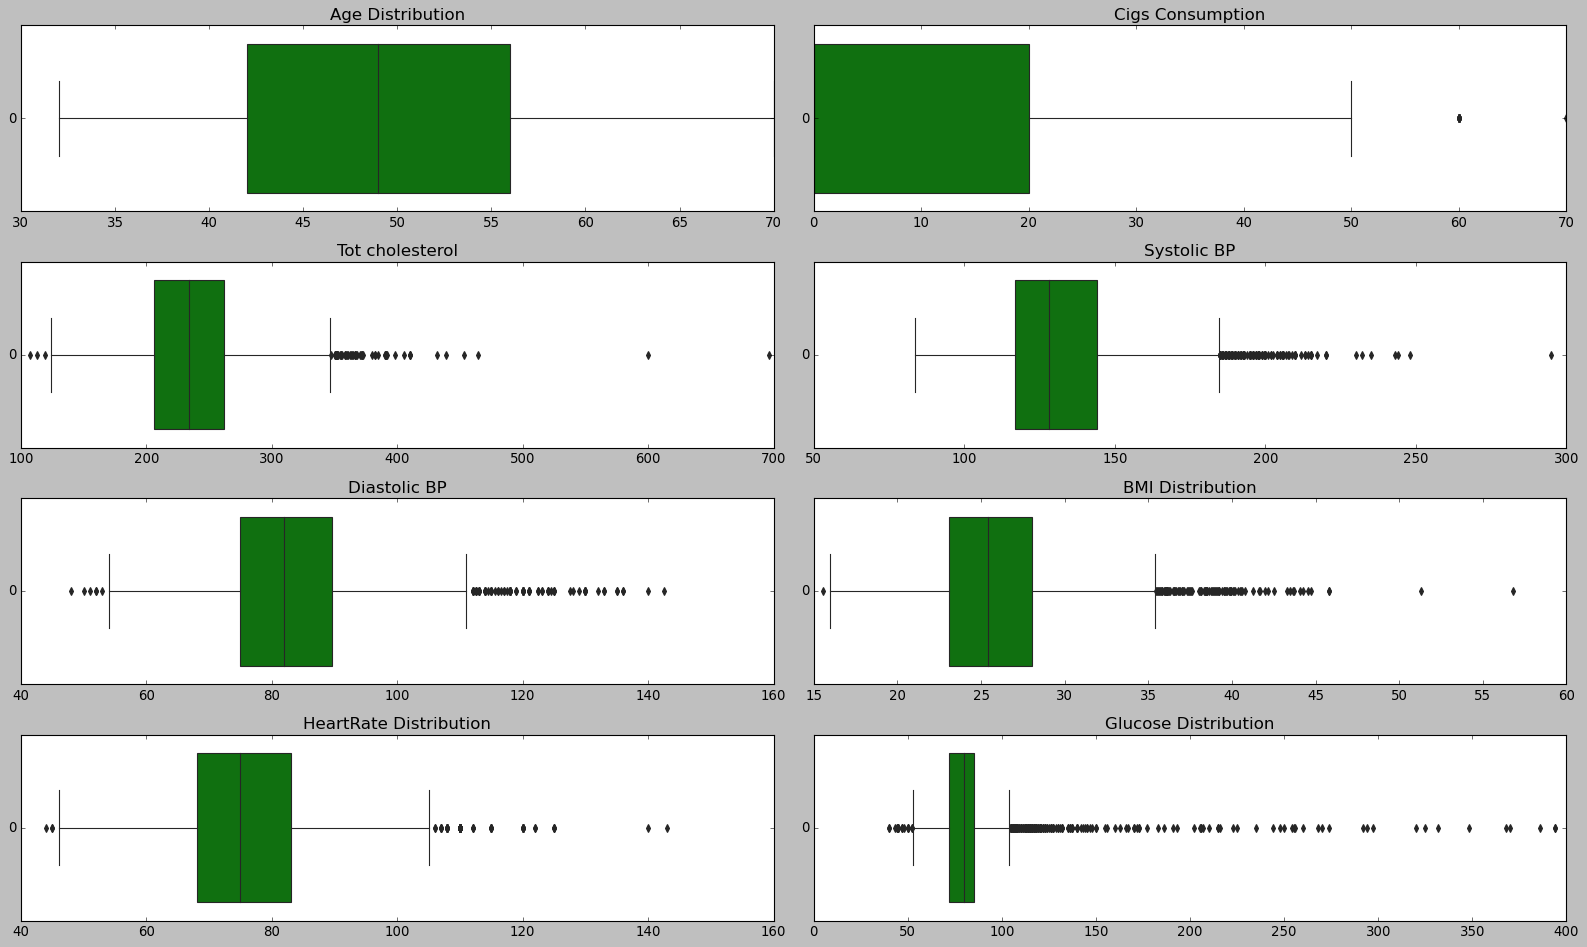

In [49]:
##BOX PLOT FOR OUTLIER TREATMENT
plt.figure(figsize=(20,10));
fig,axes = plt.subplots(nrows = 4, ncols = 2,figsize = (20,12));


a = sns.boxplot(df['age'],orient = 'h',ax = axes[0][0],color= 'Green');
a.set_title('Age Distribution',fontsize  = 15);

a = sns.boxplot(df['cigsPerDay'],orient = 'h',ax = axes[0][1],color= 'Green');
a.set_title('Cigs Consumption',fontsize  = 15);

a = sns.boxplot(df['tot cholesterol'],orient = 'h',ax = axes[1][0],color= 'Green');
a.set_title('Tot cholesterol',fontsize  = 15);

a = sns.boxplot(df['Systolic BP'],orient = 'h',ax = axes[1][1],color= 'Green');
a.set_title('Systolic BP',fontsize  = 15);

a = sns.boxplot(df['Diastolic BP'],orient = 'h',ax = axes[2][0],color= 'Green');
a.set_title('Diastolic BP',fontsize  = 15);

a = sns.boxplot(df['BMI'],orient = 'h',ax = axes[2][1],color= 'Green');
a.set_title('BMI Distribution',fontsize  = 15);

a = sns.boxplot(df['heartRate'],orient = 'h',ax = axes[3][0],color= 'Green');
a.set_title('HeartRate Distribution',fontsize  = 15);

a = sns.boxplot(df['glucose'],orient = 'h',ax = axes[3][1],color= 'Green');
a.set_title('Glucose Distribution',fontsize  = 15);

plt.tight_layout();

In [50]:
import numpy as np

def remove_outliers(col):
    col = np.sort(col)  # Sort the column
    Q1, Q3 = np.percentile(col, [25, 75])  # Calculate Q1 and Q3
    IQR = Q3 - Q1  # Interquartile range
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    return upper_bound, lower_bound

In [51]:
numeric_cols = df.select_dtypes(include=['number']).columns  # Get numeric columns
for i in numeric_cols:
    up, lp = remove_outliers(df[i])
    # clip the values to lp and up
    df[i] = df[i].clip(lower=lp, upper=up)



<Figure size 1600x800 with 0 Axes>

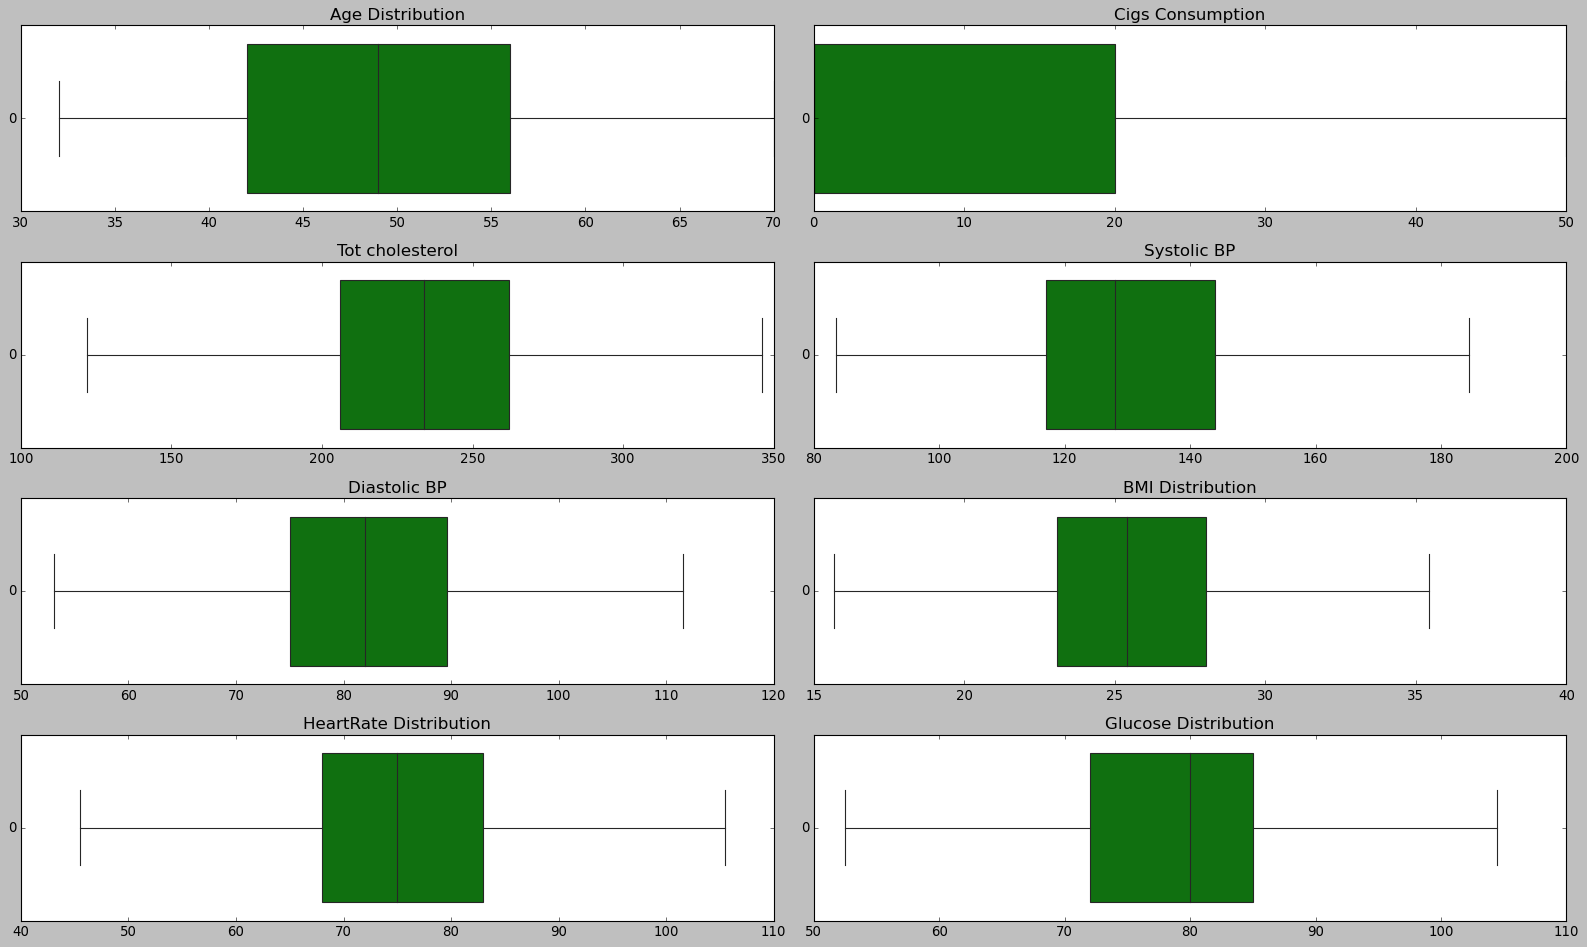

In [52]:
##BOX PLOT FOR OUTLIER TREATMENT
plt.figure(figsize=(20,10));
fig,axes = plt.subplots(nrows = 4, ncols = 2,figsize = (20,12));


a = sns.boxplot(df['age'],orient = 'h',ax = axes[0][0],color= 'Green');
a.set_title('Age Distribution',fontsize  = 15);

a = sns.boxplot(df['cigsPerDay'],orient = 'h',ax = axes[0][1],color= 'Green');
a.set_title('Cigs Consumption',fontsize  = 15);

a = sns.boxplot(df['tot cholesterol'],orient = 'h',ax = axes[1][0],color= 'Green');
a.set_title('Tot cholesterol',fontsize  = 15);

a = sns.boxplot(df['Systolic BP'],orient = 'h',ax = axes[1][1],color= 'Green');
a.set_title('Systolic BP',fontsize  = 15);

a = sns.boxplot(df['Diastolic BP'],orient = 'h',ax = axes[2][0],color= 'Green');
a.set_title('Diastolic BP',fontsize  = 15);

a = sns.boxplot(df['BMI'],orient = 'h',ax = axes[2][1],color= 'Green');
a.set_title('BMI Distribution',fontsize  = 15);

a = sns.boxplot(df['heartRate'],orient = 'h',ax = axes[3][0],color= 'Green');
a.set_title('HeartRate Distribution',fontsize  = 15);

a = sns.boxplot(df['glucose'],orient = 'h',ax = axes[3][1],color= 'Green');
a.set_title('Glucose Distribution',fontsize  = 15);

plt.tight_layout();

In [53]:
df['Gender'] = df['Gender'].replace(to_replace = ['Male','Female'],value =[1,0])

In [57]:
# Converting all columns to numerical data types
df = df.apply(pd.to_numeric, errors='coerce')


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   float64
 1   age              4240 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4240 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4240 non-null   float64
 10  Systolic BP      4240 non-null   float64
 11  Diastolic BP     4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 530.1 KB


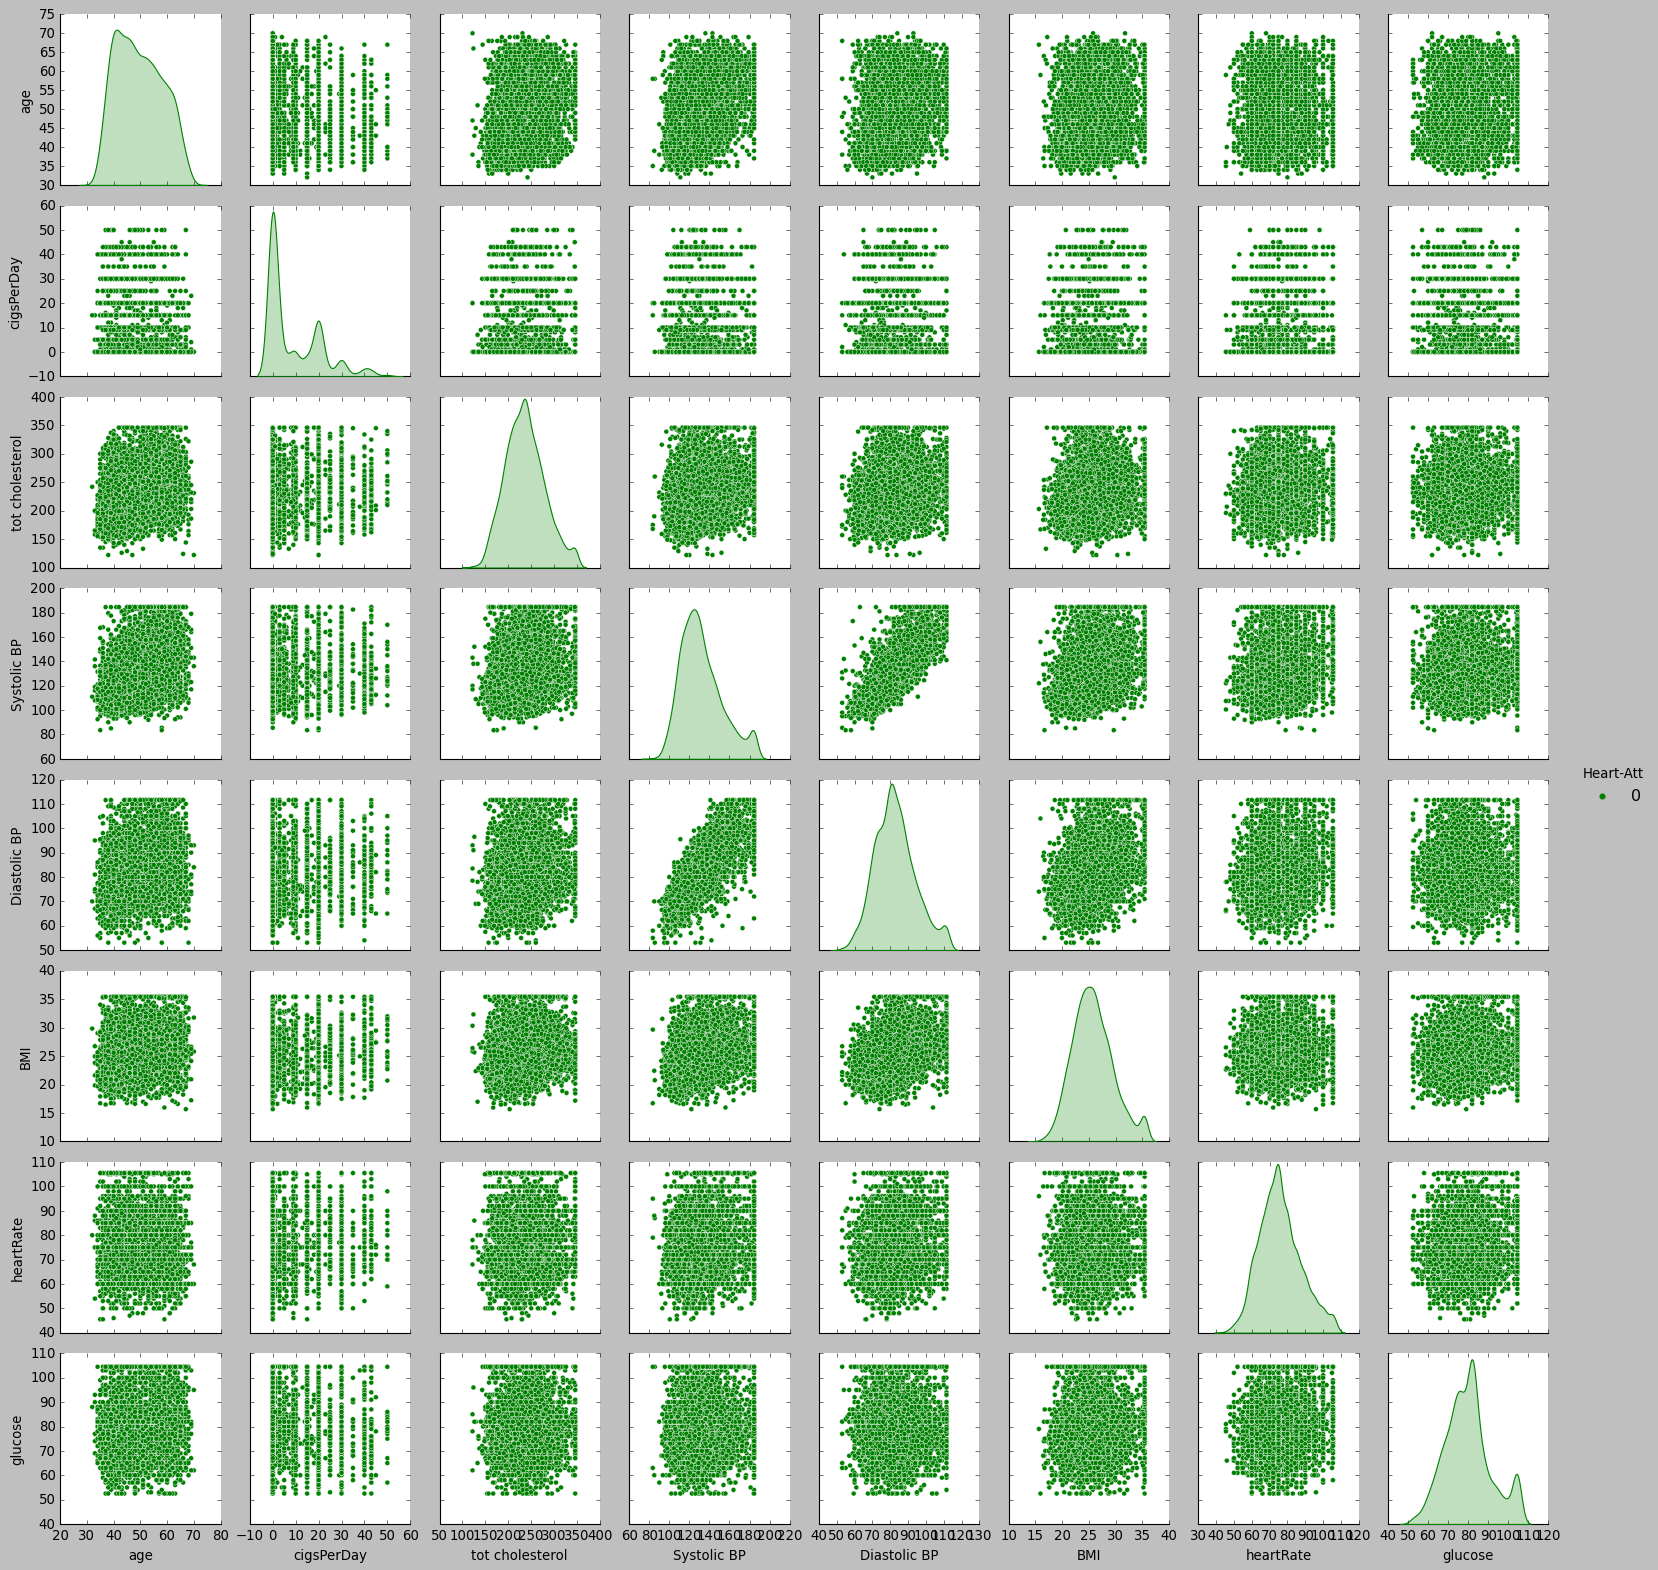

In [59]:
sns.pairplot(df[['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']], hue='Heart-Att', palette=['Green', 'Red'])


<Axes: >

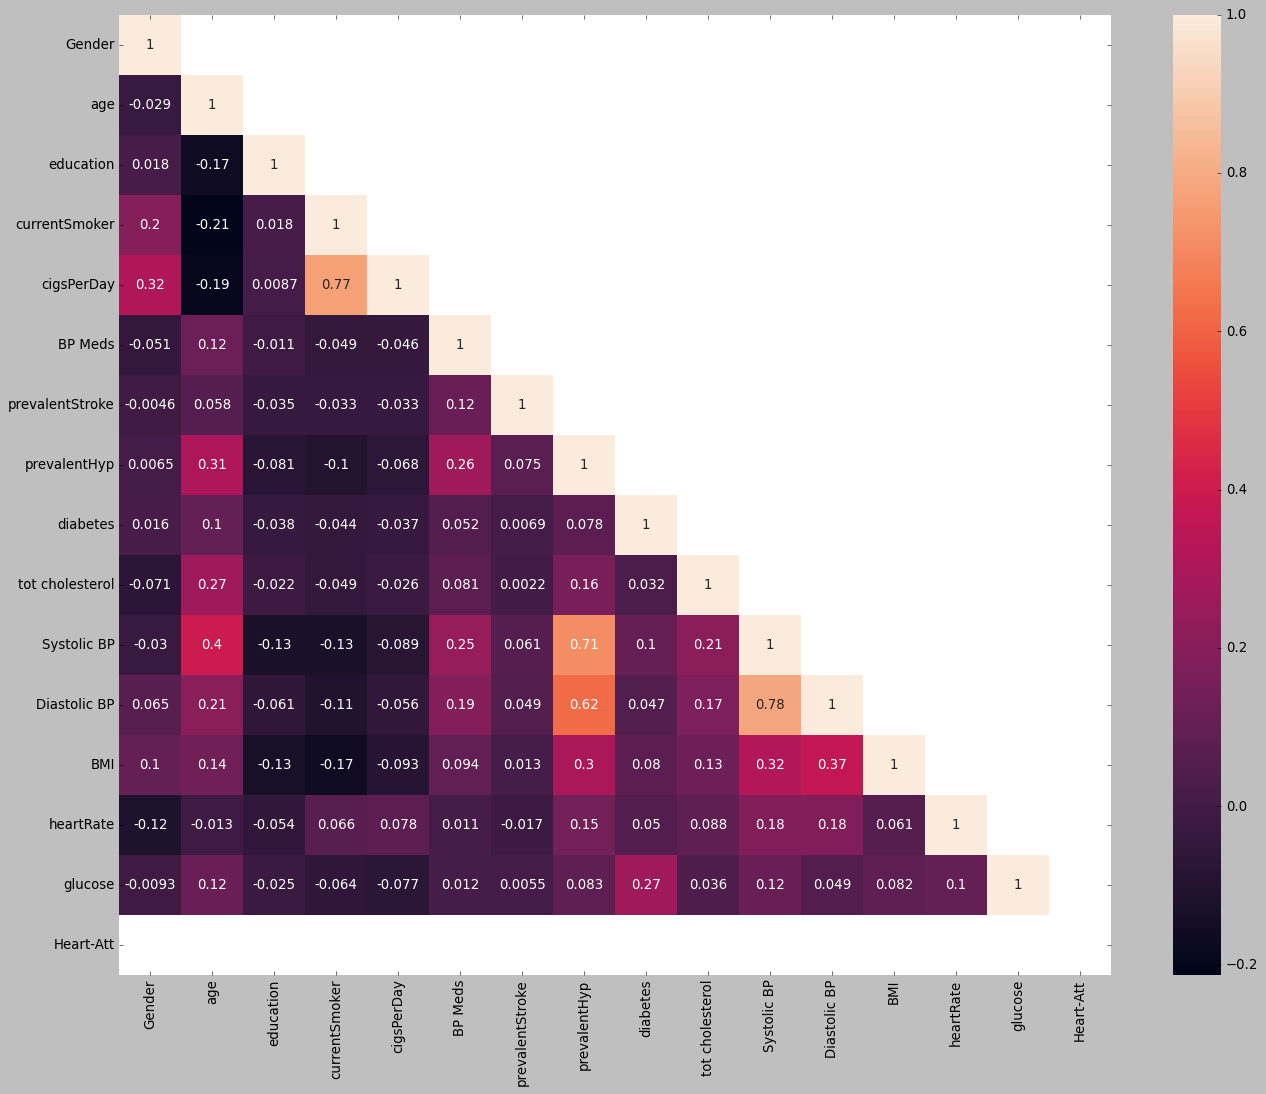

In [61]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,mask = np.triu(df.corr(),+1))

In [62]:
data = df.copy()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   float64
 1   age              4240 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4240 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4240 non-null   float64
 10  Systolic BP      4240 non-null   float64
 11  Diastolic BP     4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 530.1 KB


In [64]:
df.drop(['diabetes','currentSmoker','Diastolic BP'],inplace = True,axis = 1)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   float64
 1   age              4240 non-null   float64
 2   education        4130 non-null   float64
 3   cigsPerDay       4240 non-null   float64
 4   BP Meds          4180 non-null   float64
 5   prevalentStroke  4231 non-null   float64
 6   prevalentHyp     4238 non-null   float64
 7   tot cholesterol  4240 non-null   float64
 8   Systolic BP      4240 non-null   float64
 9   BMI              4240 non-null   float64
 10  heartRate        4240 non-null   float64
 11  glucose          4240 non-null   float64
 12  Heart-Att        4240 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 430.8 KB


In [67]:
X = df.drop('Heart-Att',axis=1)

In [82]:
X['education'].unique()

array([ 4.,  2.,  1.,  3., nan])

In [79]:
X.isnull().sum()

Gender               8
age                  0
education          110
cigsPerDay           0
BP Meds             60
prevalentStroke      9
prevalentHyp         2
tot cholesterol      0
Systolic BP          0
BMI                  0
heartRate            0
glucose              0
dtype: int64

In [81]:
X['Gender'].fillna(X['Gender'].mode,inplace=True)
X['Gender'].fillna(X['Gender'].mode,inplace=True)

In [80]:
Y.isnull().sum()

0

In [68]:
Y = df['Heart-Att']

In [71]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [73]:
X_train.shape

(2968, 12)

In [74]:
X_test.shape

(1272, 12)

In [75]:
Y_train.shape

(2968,)

In [76]:
Y_train

4033    0
3710    0
1453    0
2425    0
1010    0
       ..
2895    0
2763    0
905     0
3980    0
235     0
Name: Heart-Att, Length: 2968, dtype: int64

In [77]:
model = LogisticRegression()

In [78]:
model.fit(X_train,Y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values